In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools

In [2]:
notmonth = ['Year', 'Annual', 'HALF1', 'HALF2']

In [3]:
def format(df, area):    
    df1 = pd.melt(df, id_vars=['Year'], var_name='month', value_name='cpi')
    df1['area'] = area
    df1 = df1[['area', 'Year', 'month', 'cpi']]
    df1 = df1.rename({'Year': 'year'}, axis='columns')
    return df1

In [4]:
NewYorkNewarkJerseyCity = pd.read_csv('New York-Newark-Jersey City.csv')
NewYorkNewarkJerseyCity = format(NewYorkNewarkJerseyCity, 'New York-Newark-Jersey City')
PhiladelphiaCamdenWilmington = pd.read_csv('Philadelphia-Camden-Wilmington.csv')
PhiladelphiaCamdenWilmington = format(PhiladelphiaCamdenWilmington, 'Philadelphia-Camden-Wilmington')
BostonCambridgeNewton = pd.read_csv('Boston-Cambridge-Newton.csv')
BostonCambridgeNewton = format(BostonCambridgeNewton, 'Boston-Cambridge-Newton')
ChicagoNapervilleElgin = pd.read_csv('Chicago-Naperville-Elgin.csv')
ChicagoNapervilleElgin = format(ChicagoNapervilleElgin, 'Chicago-Naperville-Elgin')
DetroitWarrenDearborn = pd.read_csv('Detroit-Warren-Dearborn.csv')
DetroitWarrenDearborn = format(DetroitWarrenDearborn, 'Detroit-Warren-Dearborn')
ClevelandAkron = pd.read_csv('Cleveland-Akron.csv')
ClevelandAkron = format(ClevelandAkron, 'Cleveland-Akron')
AtlantaSandySpringsRoswell = pd.read_csv('Atlanta-Sandy Springs-Roswell.csv')
AtlantaSandySpringsRoswell = format(AtlantaSandySpringsRoswell, 'Atlanta-Sandy Springs-Roswell')
#DallasFortWorthArlington
DallasFortWorthArlington = pd.read_csv('Dallas-Fort Worth-Arlington.csv')
DallasFortWorthArlington = format(DallasFortWorthArlington, 'Dallas-Fort Worth-Arlington')

In [5]:
cities = pd.concat([NewYorkNewarkJerseyCity, PhiladelphiaCamdenWilmington, 
                    BostonCambridgeNewton, ChicagoNapervilleElgin, DetroitWarrenDearborn, ClevelandAkron, AtlantaSandySpringsRoswell, DallasFortWorthArlington])
cities = cities[~(cities.month.isin(notmonth))]
cities = cities.dropna()
cities.month = cities.month.replace({'Apr':4, 'Aug':8, 'Dec':12, 'Feb':2, 'Jan':1, 'Jul':7, 
                                     'Jun':6, 'Mar':3, 'May':5, 'Nov':11, 'Oct':10, 'Sep':9})
cities['year'] = cities['year'].apply(str)
cities['month'] = cities['month'].apply(str)
cities['date'] = cities['year'] + '-' + cities['month']
cities['date'] = pd.to_datetime(cities.date)
cities = cities.set_index('date')

In [6]:
area = 'Dallas-Fort Worth-Arlington'

In [7]:
cities.dtypes

area      object
year      object
month     object
cpi      float64
dtype: object

In [18]:
cities[cities.index == '2019-08']

,area,year,month,cpi
date,,,,
2019-08-01,New York-Newark-Jersey City,2019,8,303.603
2019-08-01,Philadelphia-Camden-Wilmington,2019,8,269.067
2019-08-01,Chicago-Naperville-Elgin,2019,8,254.162
2019-08-01,Detroit-Warren-Dearborn,2019,8,224.657


In [7]:
set(cities.area)

{'Atlanta-Sandy Springs-Roswell',
 'Boston-Cambridge-Newton',
 'Chicago-Naperville-Elgin',
 'Cleveland-Akron',
 'Dallas-Fort Worth-Arlington',
 'Detroit-Warren-Dearborn',
 'New York-Newark-Jersey City',
 'Philadelphia-Camden-Wilmington'}

In [9]:
cities.index.dtype

dtype('<M8[ns]')

In [93]:
cities[(cities.area == area) & (cities.year == '2011')]

,area,year,month,cpi
date,,,,
2011-01-01,Philadelphia-Camden-Wilmington,2011,1,235.276275
2011-02-01,Philadelphia-Camden-Wilmington,2011,2,235.545000
2011-03-01,Philadelphia-Camden-Wilmington,2011,3,235.897000
2011-04-01,Philadelphia-Camden-Wilmington,2011,4,236.249000
2011-05-01,Philadelphia-Camden-Wilmington,2011,5,237.500000
2011-06-01,Philadelphia-Camden-Wilmington,2011,6,238.751000
2011-07-01,Philadelphia-Camden-Wilmington,2011,7,239.742500
2011-08-01,Philadelphia-Camden-Wilmington,2011,8,240.734000
2011-09-01,Philadelphia-Camden-Wilmington,2011,9,239.825500


In [43]:
cities = cities.dropna()

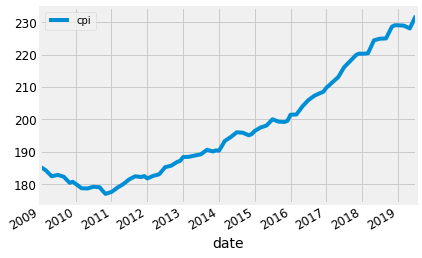

In [8]:
cities[cities['area'] == area][['cpi']].plot();

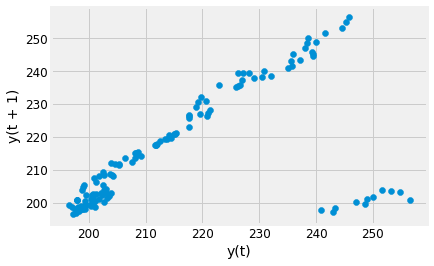

In [11]:
lag_plot(cities[cities['area'] == area][['cpi']]);

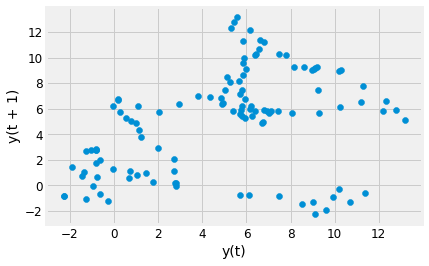

In [12]:
lag_plot(cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12']);

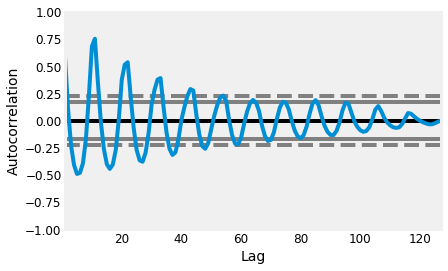

In [9]:
autocorrelation_plot(cities[cities['area'] == area][['cpi']]);
#Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

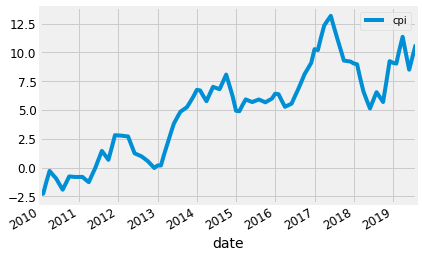

In [14]:
#matplotlib.rcParams['figure.figsize'] = 13, 5
cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12'].plot();

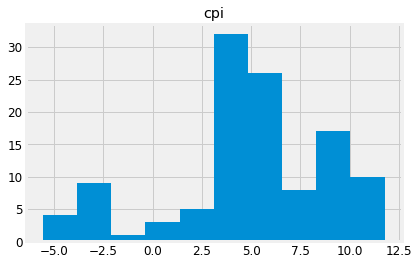

In [10]:
cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12'].hist();

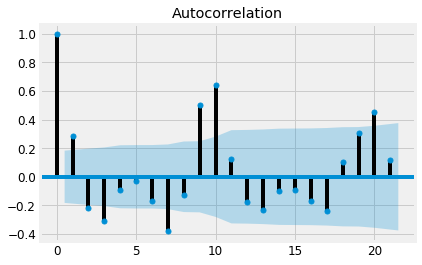

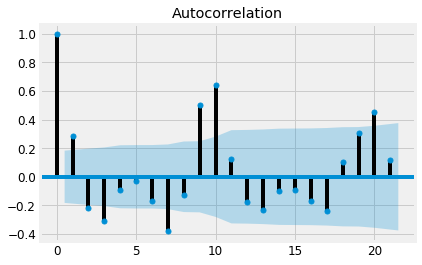

In [11]:
plot_acf(cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12'])

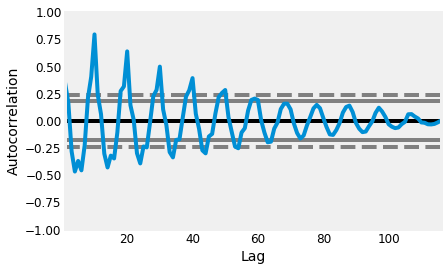

In [17]:
autocorrelation_plot(cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12']);

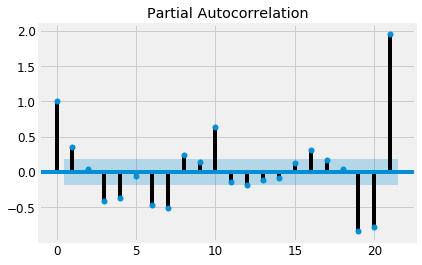

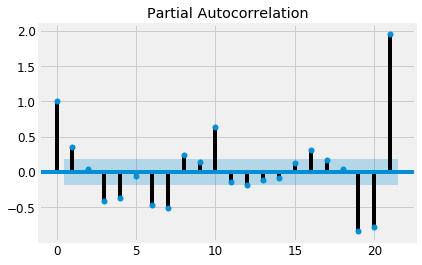

In [18]:
plot_pacf(cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12'])

In [12]:
x = cities[cities['area'] == area][['cpi']].resample('MS').mean()

In [13]:
#y = cities[cities['area'] == area][['cpi']].diff(periods=1).loc['2010-01':'2019-12'].resample('MS').mean()

In [14]:
(x - cities[cities['area'] == area][['cpi']].resample('MS').mean()).sum()

cpi    0.0
dtype: float64

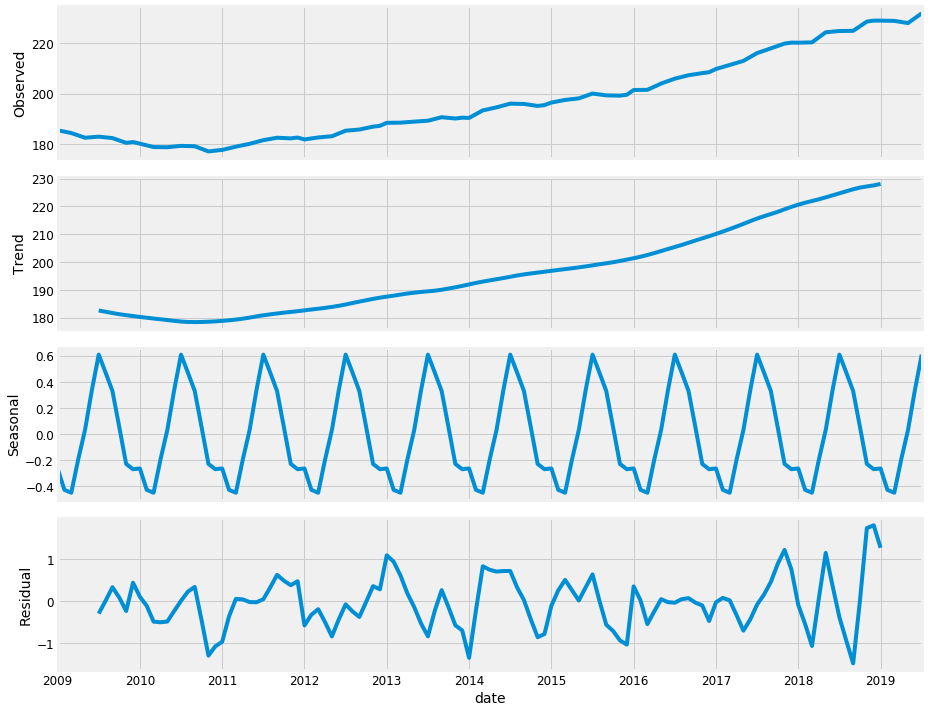

In [15]:
matplotlib.rcParams['figure.figsize'] = 13, 10
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [17]:
aic = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic.update({'ARIMA{}x{}12'.format(param, param_seasonal):results.aic})
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [33]:
list(aic.values())

[1709.7525253766785,
 1431.440536682554,
 1198.040324030436,
 671.5321807596159,
 563.3151543778622,
 505.44397751409656,
 554.2703891885001,
 469.45481357715136,
 398.2555133058004,
 590.9486113018679,
 578.7633537114187,
 466.3415211492748,
 547.7241332833041,
 544.9874747441542,
 465.4280873152299,
 487.6285177580723,
 452.7701021628907,
 389.20715247967047,
 479.20383445253356,
 445.31749985946726,
 442.4910055495017,
 485.9611843327773,
 457.4279635909981,
 424.45656098576853,
 400.8029071973832,
 395.3426351198969,
 391.1472073765134,
 1699.9741840312386,
 1425.5882089874044,
 1155.1557972580872,
 525.2688905548719,
 444.67643006000964,
 385.6259044964251,
 448.18964417048466,
 361.72658549666295,
 308.3448156788001,
 460.49580906145394,
 448.7383164488248,
 372.33532957878015,
 439.8576031186615,
 429.2407125899372,
 349.0301552901921,
 391.66145224370894,
 352.88606120269304,
 305.3508639445553,
 377.8964435618723,
 361.62687414488823,
 401.17195302201327,
 388.50901720013337,


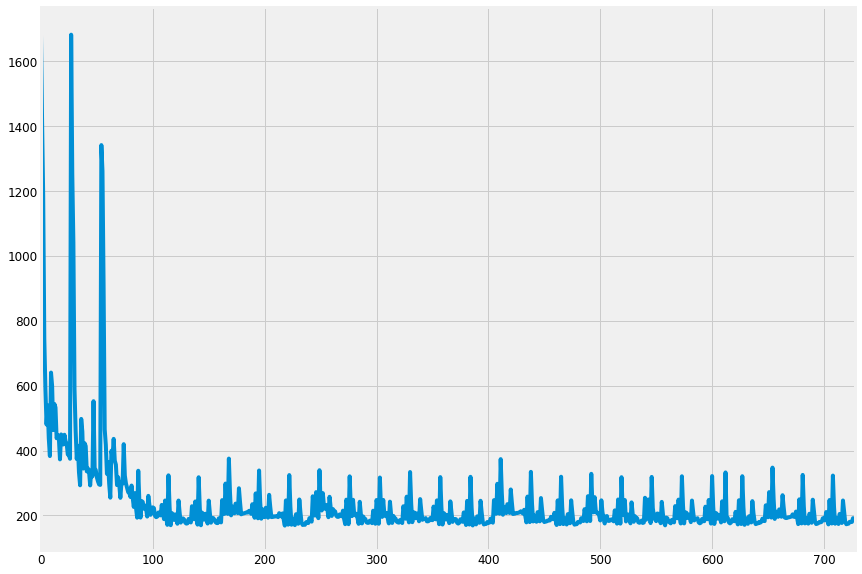

In [18]:
pd.Series(list(aic.values())).plot();

In [20]:
c = pd.Series(list(aic.values()))
c[c<170]

143    169.878080
218    168.823343
386    169.225224
558    169.567161
dtype: float64

In [25]:
for k, v in aic.items():
    if v < 172:
        print(round(v), k)

171.0 ARIMA(0, 1, 1)x(0, 1, 2, 12)12
170.0 ARIMA(0, 1, 1)x(0, 2, 2, 12)12
172.0 ARIMA(0, 1, 2)x(0, 1, 2, 12)12
170.0 ARIMA(0, 1, 2)x(0, 2, 2, 12)12
169.0 ARIMA(0, 2, 2)x(0, 0, 2, 12)12
172.0 ARIMA(0, 2, 2)x(0, 1, 2, 12)12
172.0 ARIMA(0, 2, 2)x(0, 2, 2, 12)12
170.0 ARIMA(0, 2, 2)x(1, 0, 2, 12)12
171.0 ARIMA(0, 2, 2)x(2, 0, 0, 12)12
172.0 ARIMA(0, 2, 2)x(2, 0, 1, 12)12
171.0 ARIMA(0, 2, 2)x(2, 0, 2, 12)12
171.0 ARIMA(1, 1, 2)x(0, 0, 2, 12)12
169.0 ARIMA(1, 1, 2)x(0, 2, 2, 12)12
171.0 ARIMA(1, 2, 2)x(0, 0, 2, 12)12
172.0 ARIMA(1, 2, 2)x(2, 0, 0, 12)12
170.0 ARIMA(2, 0, 2)x(2, 0, 0, 12)12
171.0 ARIMA(2, 1, 2)x(0, 2, 2, 12)12


In [26]:
area

'Dallas-Fort Worth-Arlington'

In [27]:
# "Dallas-Fort Worth-Arlington"
mod = sm.tsa.statespace.SARIMAX(x,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5641      0.093      6.091      0.000       0.383       0.746
ma.S.L12      -0.8436      0.098     -8.621      0.000      -1.035      -0.652
ma.S.L24       0.1804      0.117      1.536      0.125      -0.050       0.411
sigma2         0.3630      0.048      7.581      0.000       0.269       0.457


In [28]:
print(results.summary().tables[2])

Ljung-Box (Q):                       18.69   Jarque-Bera (JB):                 3.14
Prob(Q):                              1.00   Prob(JB):                         0.21
Heteroskedasticity (H):               1.85   Skew:                             0.20
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.84


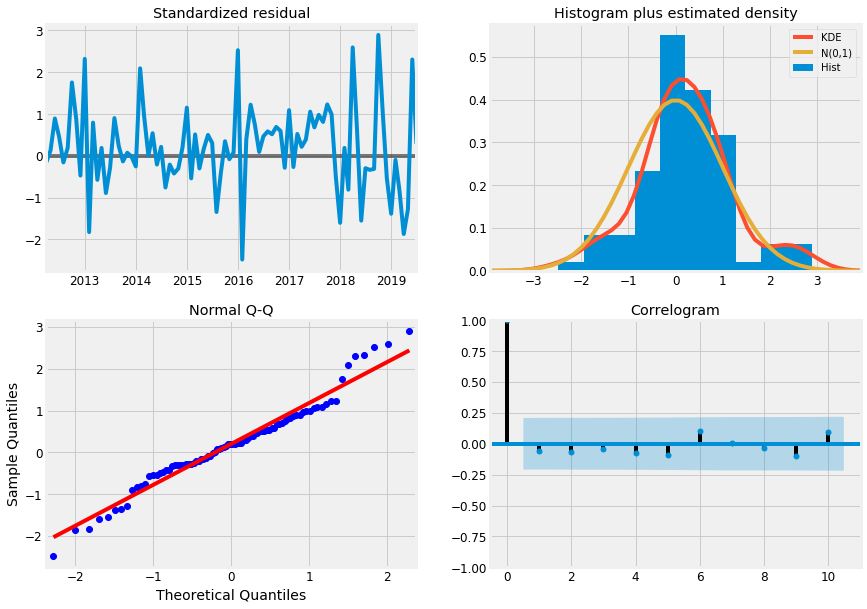

In [29]:
results.plot_diagnostics();

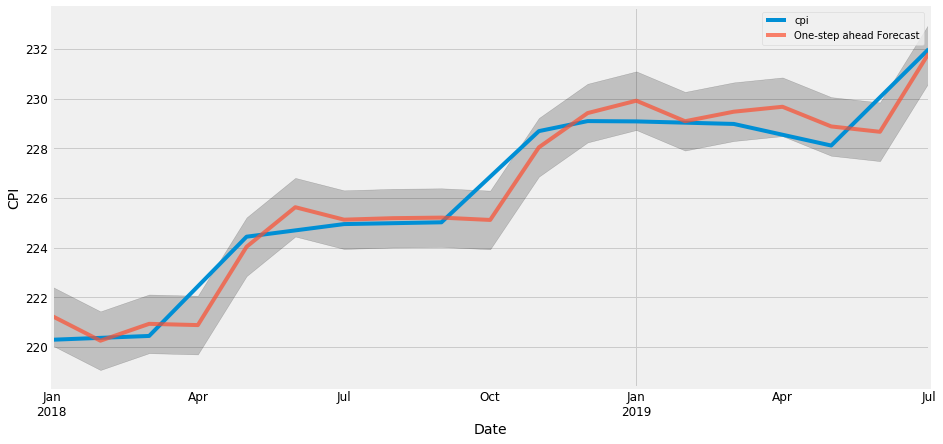

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = x['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CPI')
plt.legend()
plt.show()

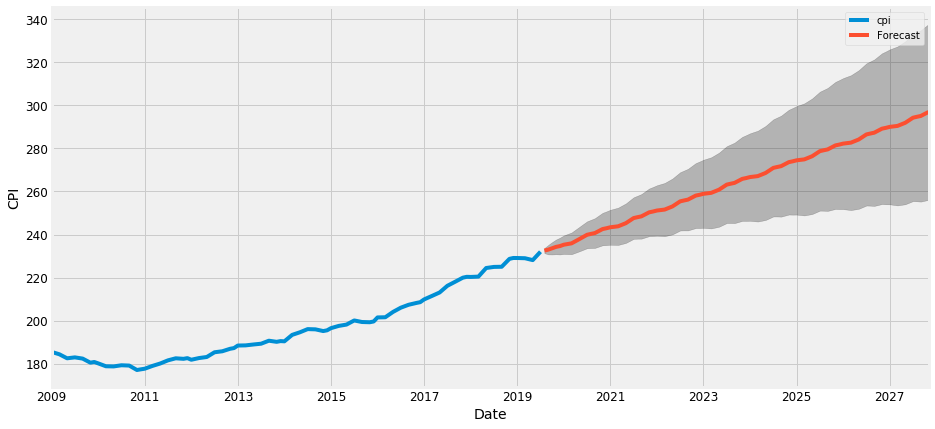

In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = x.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CPI')
plt.legend()
plt.show()

In [32]:
preds = pred_uc.summary_frame()
preds = preds.rename(index={'cpi':'date'})
preds = preds.rename_axis('date')
preds = preds.reset_index()

In [33]:
preds['mean_change'] = (preds['mean']/x['cpi'][-1] - 1)*100
preds['city'] = area
cols = preds.columns.tolist()
cols = cols[-1:] + cols[:-1]
preds = preds[cols]

In [34]:
preds.head()

cpi,city,date,mean,mean_se,mean_ci_lower,mean_ci_upper,mean_change
0,Dallas-Fort Worth-Arlington,2019-08-01,232.529437,0.602474,231.348610,233.710264,0.231230
1,Dallas-Fort Worth-Arlington,2019-09-01,232.969215,1.118438,230.777117,235.161313,0.420795
2,Dallas-Fort Worth-Arlington,2019-10-01,233.609617,1.462475,230.743220,236.476015,0.696839
3,Dallas-Fort Worth-Arlington,2019-11-01,234.250020,1.739759,230.840156,237.659884,0.972883
4,Dallas-Fort Worth-Arlington,2019-12-01,234.622724,1.978557,230.744823,238.500625,1.133536


In [35]:
preds[(preds['date'] == '2020-08') & (preds['city'] == area)][['mean_change']]

cpi,mean_change
12,3.572544


In [41]:
import pickle
pickle_out = open("Cities_Housing_CPI.pkl", "wb")
pickle.dump(appended, pickle_out)
pickle_out.close()

In [36]:
import pickle
pickle_in = open("Cities_Housing_CPI.pkl", "rb")
cities = pickle.load(pickle_in)

In [37]:
len(preds), len(cities)

(100, 700)

In [38]:
appended = pd.concat([cities, preds])
print(len(appended))

800


In [39]:
appended.city.unique()

array(['New York-Newark-Jersey City', 'Chicago-Naperville-Elgin',
       'Philadelphia-Camden-Wilmington', 'Boston-Cambridge-Newton',
       'Detroit-Warren-Dearborn', 'Cleveland-Akron',
       'Atlanta-Sandy Springs-Roswell', 'Dallas-Fort Worth-Arlington'],
      dtype=object)

In [40]:
area

'Dallas-Fort Worth-Arlington'

In [3]:
import requests, json

In [115]:
url = 'http://127.0.0.1:5000/api'
data = json.dumps(nynj[nynj['date'] == '2019-09']['mean_change'].to_string()[5:])
r = requests.post(url, data)

print(r.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [59]:
url = 'http://127.0.0.1:5000/api'
date = json.dumps('2019-08')
r = requests.post(url, date)
#data = request.get_json(force=True)   # this line goes to predict.py
print(r.json())
print(date)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [90]:
if ('New York') or ('Newark') or ('Jersey City') in 'New York-Newark-Jersey City':
    print("Yes")

Yes


In [91]:
if ['New York', 'Newark', 'Jersey City'] in 'New York-Newark-Jersey City':
    print('YES')

TypeError: 'in <string>' requires string as left operand, not list